In [18]:
%load_ext autoreload
%autoreload 2

import sys
#sys.path.append('/global/homes/l/lbigwood/LSS/py')
sys.path.append('/global/homes/l/lbigwood/S4Mock/')

import S4Mock_io
import geometry
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

nside=32
orig_density_per_deg = 2500

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#open randoms
randoms = S4Mock_io.read_desitargetrandoms()

In [3]:
#apply bgs mask to randoms and printed statement shows cuts 
randoms=geometry.bgs_mask_randoms(randoms)

BRIGHT 1 0.9905997485514495
CLUSTER 13 0.9904709859266433
NOBS 0.9771151783418405


In [7]:
target_pixel_density = geometry.targ_hpmap(randoms)

NameError: name 'hp' is not defined

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


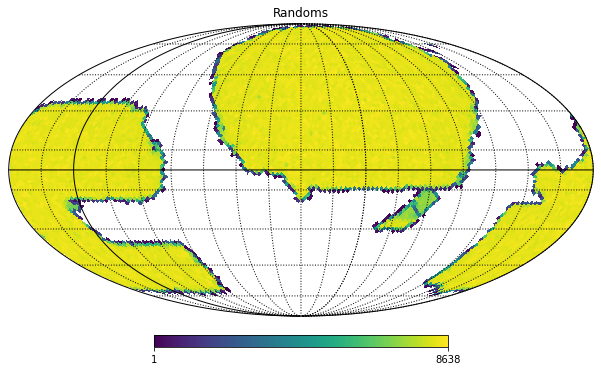

In [9]:
#mollview map of pixels
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

In [20]:
#Caluclate norm i.e corr_pixel_area
pixel_area = hp.nside2pixarea(nside,degrees=True)

exp_density_per_pixel = pixel_area *orig_density_per_deg
filling_factor = target_pixel_density/exp_density_per_pixel
corr_pixel_area = pixel_area * filling_factor 

Text(0.5, 0, 'Random filling factor')

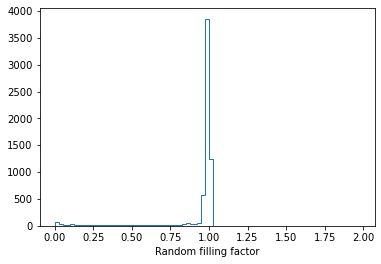

In [21]:
#histogram of filling factor: why does it have this shape?
_ = plt.hist(filling_factor, bins=np.arange(0.0, 2.0, 0.025), histtype='step')
plt.xlabel('Random filling factor')

In [22]:
main_survey_targs = S4Mock_io.read_mainsurvey_targets()

Runtime of 0.166276 seconds after 0 pixels
Runtime of 6.856043 seconds after 20 pixels
Runtime of 16.907733 seconds after 40 pixels
Runtime of 26.153579 seconds after 60 pixels
Runtime of 33.117660 seconds after 80 pixels
Runtime of 45.215915 seconds after 100 pixels
Runtime of 63.138001 seconds after 120 pixels
Runtime of 66.588396 seconds after 140 pixels
Runtime of 74.496872 seconds after 160 pixels
Runtime of 82.998540 seconds after 180 pixels
Runtime of 91.561246 seconds after 200 pixels
Runtime of 97.162934 seconds after 220 pixels
Runtime of 101.354300 seconds after 240 pixels
Runtime of 109.401199 seconds after 260 pixels
Runtime of 116.272181 seconds after 280 pixels
Runtime of 137.216367 seconds after 300 pixels
Runtime of 151.417508 seconds after 320 pixels
Runtime of 158.255453 seconds after 340 pixels
Runtime of 165.397517 seconds after 360 pixels
Runtime of 171.918026 seconds after 380 pixels
Runtime of 178.450630 seconds after 400 pixels
Runtime of 186.998124 seconds aft

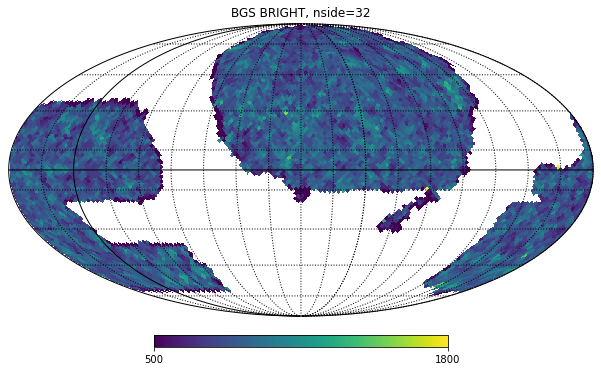

In [29]:
target_pixel_density = geometry.targ_hpmap(main_survey_targs,norm=corr_pixel_area)

#mollview map of pixels
#mollview map of pixels
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='BGS BRIGHT, nside=32',min=500,max=1800)
hp.graticule(dpar=5, dmer=5) 

Text(0.5, 1.0, 'Two randoms')

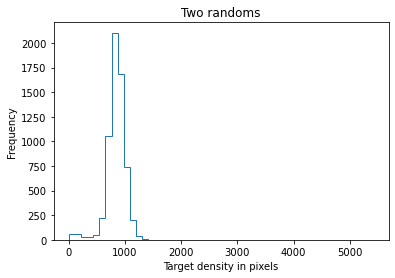

In [30]:
_ = plt.hist(target_pixel_density, bins=50,histtype='step')

plt.xlabel('Random filling factor')
plt.xlabel('Target density in pixels')
plt.ylabel('Frequency')
plt.title('Two randoms')